In [5]:
# Import der notwendigen Bibliotheken
import os, pathlib, sys

# Falls Notebook in analysis/ läuft: nach Projektwurzel wechseln
if not os.path.exists('data-raw') and os.path.exists('..'):
    os.chdir('..')
    print(f"🔁 Arbeitsverzeichnis gewechselt zu: {os.getcwd()}")

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Sicherstellen, dass Projektwurzel im Pfad liegt
if '.' not in sys.path:
    sys.path.append('.')

# Robustere Import-Strategie (erst Modul, dann Attribute)
import importlib
loader = importlib.import_module('R.oparl_data_loader')

DATA_RAW_DIR = getattr(loader, 'DATA_RAW_DIR_STR', str(getattr(loader, 'DATA_RAW_DIR', 'data-raw')))
load_augsburg_data = getattr(loader, 'load_augsburg_data')

print("✓ Bibliotheken geladen")
print(f"📂 DATA_RAW_DIR: {DATA_RAW_DIR}")

✓ Bibliotheken geladen
📂 DATA_RAW_DIR: data-raw


## 1. Daten laden

Lädt Meetings, Papers und Geodaten mit einer Funktion.

In [6]:
# Lade alle Daten
print(f"Arbeitsverzeichnis vor Laden: {os.getcwd()}")
df_meetings, df_locations, df_geocoded = load_augsburg_data(
    date_from='2020-01-01',
    date_to='2025-11-20',
    load_papers=True,
    geocode_locations_flag=False,  # Geocoding dauert lange - setze auf True wenn gewünscht
    max_paper_pages=10,
    max_meeting_pages=50
)

print("\n✅ DATEN GELADEN!")
print(f"   Meetings: {len(df_meetings)}")
print(f"   Papers mit Orten: {len(df_locations) if df_locations is not None else 0}")
if df_locations is not None and not df_locations.empty:
    print(f"   Eindeutige Orte: {df_locations['location'].nunique()}")

Arbeitsverzeichnis vor Laden: /Users/benedikt.pilgram/Code/Geomodelierung/analysis
AUGSBURG OPARL DATA LOADER
Zeitraum: 2020-01-01 bis 2025-11-20

📦 Lade Daten aus Cache: data-raw/augsburg_meetings_cache.parquet
✓ 120 Sitzungen aus Cache geladen
🔄 Lade Organisationsnamen...
   19 verschiedene Organisationen
   5/19 geladen...
   10/19 geladen...
   15/19 geladen...
✓ Organisationsnamen geladen!

✓ 0 Meetings nach Filterung (2020-01-01 - 2025-11-20)


✅ DATEN GELADEN!
   Meetings: 0
   Papers mit Orten: 0


## 2. Zeitliche Analysen

IndexError: index 0 is out of bounds for axis 0 with size 0

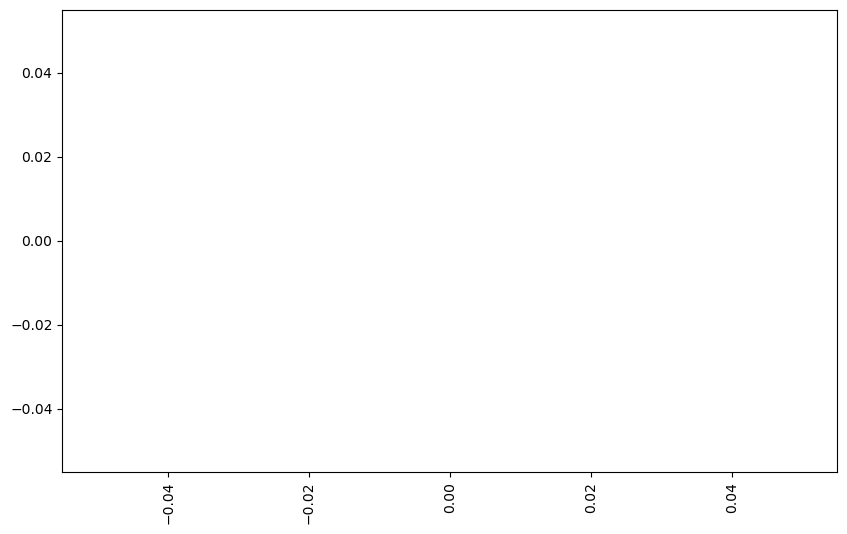

In [7]:
# Sitzungen nach Uhrzeit
plt.figure(figsize=(10, 6))
counts = df_meetings['hour'].value_counts().sort_index()
counts.plot(kind='bar', color='#A020F0', edgecolor='black')

plt.title('Sitzungen nach Uhrzeit', fontsize=14, fontweight='bold')
plt.xlabel('Uhrzeit (Stunde)', fontsize=12)
plt.ylabel('Anzahl Sitzungen', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

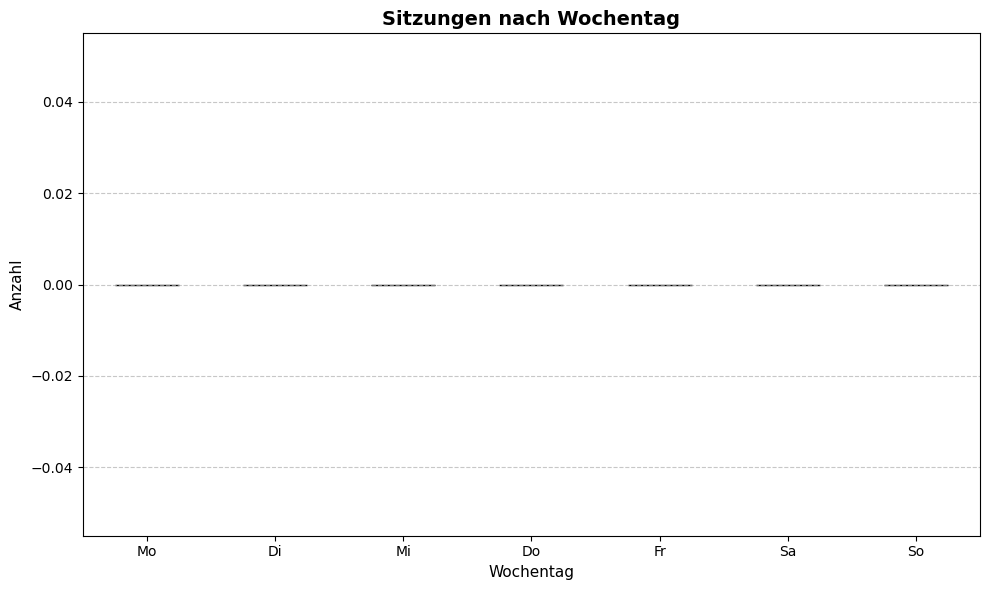


Beliebtester Tag: Monday (0 Sitzungen)


In [8]:
# Sitzungen nach Wochentag
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df_meetings['weekday'].value_counts().reindex(weekday_order, fill_value=0)

plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='#2E8B57', edgecolor='black')
plt.title('Sitzungen nach Wochentag', fontsize=14, fontweight='bold')
plt.xlabel('Wochentag', fontsize=11)
plt.ylabel('Anzahl', fontsize=11)
plt.xticks(range(7), ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"\nBeliebtester Tag: {weekday_counts.idxmax()} ({weekday_counts.max()} Sitzungen)")

## 3. Gremien-Analyse

📋 Top 10 aktivste Gremien:


IndexError: index 0 is out of bounds for axis 0 with size 0

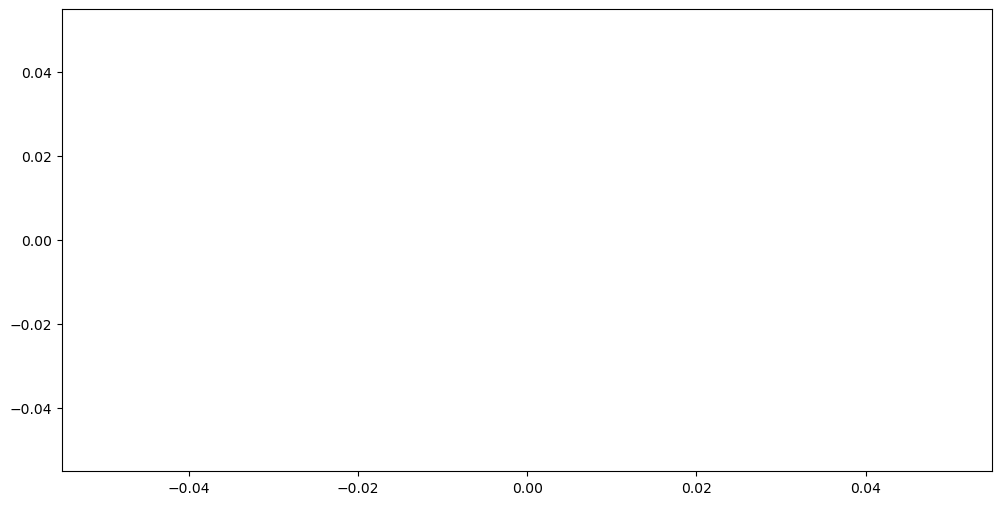

In [9]:
# Top 10 aktivste Gremien
org_counts = df_meetings['organization_name'].value_counts().head(10)

print("📋 Top 10 aktivste Gremien:")
for i, (org, count) in enumerate(org_counts.items(), 1):
    print(f"   {i}. {org[:60]}: {count} Sitzungen")

# Visualisierung
plt.figure(figsize=(12, 6))
org_counts.plot(kind='barh', color='#4682B4', edgecolor='black')
plt.title('Top 10 aktivste Gremien', fontsize=14, fontweight='bold')
plt.xlabel('Anzahl Sitzungen', fontsize=11)
plt.ylabel('Gremium', fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 4. Geo-Analyse (Papers mit Ortsangaben)

In [10]:
if df_locations is not None and not df_locations.empty:
    print(f"📍 {len(df_locations)} Papers mit Ortsangaben gefunden\n")

    # Top 15 Orte
    top_15 = df_locations['location'].value_counts().head(15)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Linke Grafik: Top Orte
    top_15.plot(kind='barh', ax=ax1, color='#2E8B57', edgecolor='black')
    ax1.set_title('Top 15 Orte in Papers', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Anzahl Nennungen', fontsize=11)
    ax1.set_ylabel('Ort', fontsize=11)
    ax1.grid(axis='x', linestyle='--', alpha=0.7)
    ax1.invert_yaxis()

    # Rechte Grafik: Paper-Typen
    type_counts = df_locations['type'].value_counts().head(10)
    type_counts.plot(kind='barh', ax=ax2, color='#4682B4', edgecolor='black')
    ax2.set_title('Paper-Typen mit Ortsangaben', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Anzahl', fontsize=11)
    ax2.set_ylabel('Paper-Typ', fontsize=11)
    ax2.grid(axis='x', linestyle='--', alpha=0.7)
    ax2.invert_yaxis()

    plt.tight_layout()
    plt.show()

    # Details
    print("\n🗺️  Interessante Papers mit Ortsangaben:\n")
    interesting = df_locations[~df_locations['location'].isin(['Augsburg'])].head(5)
    for i, row in interesting.iterrows():
        print(f"• {row['location']}")
        print(f"  {row['paper_name'][:80]}...")
        print(f"  {row['date']} ({row['type']})\n")
else:
    print("⚠️  Keine Ortsdaten geladen (setze load_papers=True)")

⚠️  Keine Ortsdaten geladen (setze load_papers=True)


## 5. Karten-Visualisierung

Falls Geocoding aktiviert wurde, erstelle eine interaktive Karte.

In [11]:
if df_geocoded is not None and not df_geocoded.empty:
    import folium
    import os

    print("🗺️  ERSTELLE INTERAKTIVE KARTE\n")

    successful = df_geocoded[df_geocoded['success'] == True]

    if not successful.empty:
        # Zentrum: Augsburg Rathaus
        center_lat, center_lon = 48.3684, 10.8978

        m = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles='OpenStreetMap')

        # Marker für jeden Ort
        for idx, row in successful.iterrows():
            count = len(df_locations[df_locations['location'] == row['location']])

            popup_text = f"""
            <div style="font-family: Arial; width: 200px;">
                <b>{row['location']}</b><br>
                <hr style="margin: 5px 0;">
                📍 {row['lat']:.6f}, {row['lon']:.6f}<br>
                📄 {count} Paper(s)<br>
                <small>{row['full_address']}</small>
            </div>
            """

            color = 'red' if count >= 2 else 'blue'

            folium.Marker(
                location=[row['lat'], row['lon']],
                popup=folium.Popup(popup_text, max_width=250),
                tooltip=row['location'],
                icon=folium.Icon(color=color, icon='info-sign')
            ).add_to(m)

        # Zentrum
        folium.Marker(
            location=[center_lat, center_lon],
            popup='Rathaus Augsburg',
            icon=folium.Icon(color='green', icon='star', prefix='fa')
        ).add_to(m)

        # Speichern
        map_file = '../outputs/figures/augsburg_locations_map.html'
        os.makedirs('../outputs/figures', exist_ok=True)
        m.save(map_file)

        print(f"✅ Karte mit {len(successful)} Orten erstellt")
        print(f"💾 Gespeichert: {map_file}")

        display(m)
    else:
        print("⚠️  Keine erfolgreich geocodierten Orte")
else:
    print("⚠️  Keine Geocoding-Daten (setze geocode_locations_flag=True)")
    print("   Achtung: Geocoding dauert ca. 20-30 Sekunden wegen Rate Limits!")

⚠️  Keine Geocoding-Daten (setze geocode_locations_flag=True)
   Achtung: Geocoding dauert ca. 20-30 Sekunden wegen Rate Limits!


## Zusammenfassung

Dieses Notebook nutzt den ausgelagerten Data Loader aus `R/oparl_data_loader.py`.

**Vorteile:**
- ✅ Übersichtliches Notebook (nur Analysen)
- ✅ Wiederverwendbarer Code
- ✅ Automatisches Caching
- ✅ Einfache Anpassung der Parameter